In [94]:
SIG_LEVEL = 0.005

In [95]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot
import matplotlib as plt

In [96]:
data_raw = pd.read_csv("movieReplicationSet.csv")

In [97]:
data_raw

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [98]:
## Question 1
## Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular?

movies = data_raw.iloc[: , :400]
ratings_count = movies.count()
ratings_sorted = np.sort(ratings_count)
ratings_median = np.median(ratings_sorted)

more_popular = []
less_popular = []

for movie in movies:
    num_ratings = movies[movie].count()
    if num_ratings > ratings_median:
        more_popular.append(movies[movie].mean())
    else:
        less_popular.append(movies[movie].mean())
        
result = stats.mannwhitneyu(less_popular, more_popular)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("Movies that are more popular are rated higher than movies that are less popular")
else:
    print("Movies that are more popular are not rated higher than movies that are less popular")
    
result

1.6971433120157929e-40
Movies that are more popular are rated higher than movies that are less popular


MannwhitneyuResult(statistic=4596.0, pvalue=1.6971433120157929e-40)

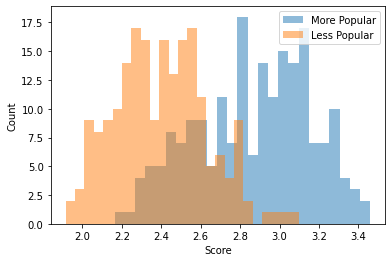

In [99]:
pyplot.hist(more_popular, bins=25, alpha=0.5, label="More Popular")
pyplot.hist(less_popular, bins=25, alpha=0.5, label="Less Popular")
pyplot.xlabel("Score")
pyplot.ylabel("Count")
pyplot.gca().legend(["More Popular", "Less Popular"])
pyplot.show()

In [101]:
## Question 2
## Are movies that are newer rated differently than movies that are older?
titles = movies.keys()
movie_years = []

for title in titles:
    try:
        movie_years.append(int(title[-5:-1]))
    except ValueError:
        pass
    
median_year = np.median(movie_years)

new_movies = []
old_movies = []

for movie in movies:
    try:
        year = int(movie[-5:-1])
        if year > median_year:
            new_movies.append(movies[movie].mean())
        else:
            old_movies.append(movies[movie].mean())
    except ValueError:
        pass

result = stats.mannwhitneyu(old_movies, new_movies)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("Movies that are newer are rated differently than movies that are older")
else:
    print("Movies that are newer are not rated differently than movies that are older")
    
result

0.2759748581282473
Movies that are newer are not rated differently than movies that are older


MannwhitneyuResult(statistic=18330.0, pvalue=0.2759748581282473)

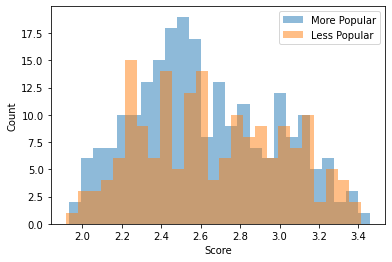

In [81]:
pyplot.hist(old_movies, bins=25, alpha=0.5, label="More Popular")
pyplot.hist(new_movies, bins=25, alpha=0.5, label="Less Popular")
pyplot.xlabel("Score")
pyplot.ylabel("Count")
pyplot.gca().legend(["More Popular", "Less Popular"])
pyplot.show()

In [105]:
#Question 3
genders = data_raw.iloc[:,474]
shrek = data_raw.filter(regex = "Shrek \\(")

male = []
female = []

for i in range(len(shrek)):
    if genders.iloc[i].item() == 1:
        if not np.isnan(shrek.iloc[i].item()):
            female.append(shrek.iloc[i])
    elif genders.iloc[i] == 2:
        if not np.isnan(shrek.iloc[i].item()):
            male.append(shrek.iloc[i])

result = stats.mannwhitneyu(male, female)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("The score of Shrek is gendered")
else:
    print("The score of Shrek is not gendered")
    
result

[0.05053663]
The score of Shrek is not gendered


MannwhitneyuResult(statistic=array([82232.5]), pvalue=array([0.05053663]))

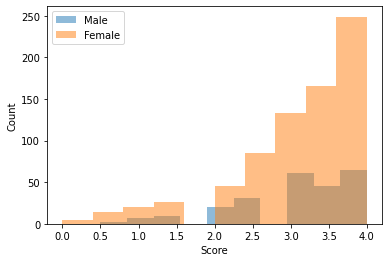

In [80]:
m_data = []
for m in male:
    m_data.append(m.item())
    
f_data = []
for m in female:
    f_data.append(m.item())
#put graph for the code above
pyplot.hist(m_data, bins=10, alpha=0.5, label="Male")
pyplot.hist(f_data, bins=10, alpha=0.5, label="Female")
pyplot.xlabel("Score")
pyplot.ylabel("Count")
pyplot.gca().legend(["Male", "Female"])
pyplot.show()

In [13]:
#Question 4
results = []
final_results = []

for movie in movies:
    genders = data_raw.iloc[:,474]
    current_movie = movies[movie]

    male = []
    female = []

    for i in range(len(current_movie)):
        if genders.iloc[i].item() == 1:
            if not np.isnan(current_movie.iloc[i].item()):
                female.append(current_movie.iloc[i])
        elif genders.iloc[i] == 2:
            if not np.isnan(current_movie.iloc[i].item()):
                male.append(current_movie.iloc[i])

    results.append(stats.mannwhitneyu(male, female))
    
for result in results:
    if result.pvalue < SIG_LEVEL:
        final_results.append(result)
        
print(len(final_results)/400)

0.125


In [14]:
#Question 5:

[0.04319873]
The score of Shrek is not dependent on being an only child


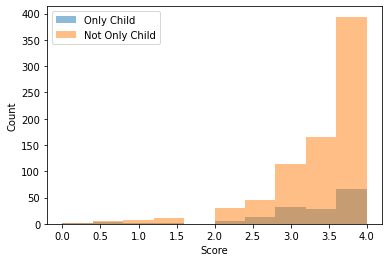

MannwhitneyuResult(statistic=array([64247.]), pvalue=array([0.04319873]))

In [112]:
sibling = data_raw.iloc[:,475]
lion = data_raw.filter(regex = "Lion King")

only_child = []
not_only_child = []

for i in range(len(lion)):
    if sibling.iloc[i].item() == 1:
        if not np.isnan(lion.iloc[i].item()):
            only_child.append(lion.iloc[i])
    elif sibling.iloc[i] == 0:
        if not np.isnan(lion.iloc[i].item()):
            not_only_child.append(lion.iloc[i])

result = stats.mannwhitneyu(not_only_child, only_child)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("The score of Shrek is dependent on being an only child")
else:
    print("The score of Shrek is not dependent on being an only child")

m_data = []
for m in only_child:
    m_data.append(m.item())
    
f_data = []
for m in not_only_child:
    f_data.append(m.item())
    
pyplot.hist(m_data, bins=10, alpha=0.5, label="Only Child")
pyplot.hist(f_data, bins=10, alpha=0.5, label="Not Only Child")
pyplot.xlabel("Score")
pyplot.ylabel("Count")
pyplot.gca().legend(["Only Child", "Not Only Child"])
pyplot.show()
result

In [87]:
#Question 6
results = []
final_results = []

for movie in movies:
    sibling = data_raw.iloc[:,475]
    current_movie = movies[movie]

    only_child = []
    not_only_child = []

    for i in range(len(current_movie)):
        if sibling.iloc[i].item() == 1:
            if not np.isnan(current_movie.iloc[i].item()):
                only_child.append(current_movie.iloc[i])
        elif sibling.iloc[i] == 0:
            if not np.isnan(current_movie.iloc[i].item()):
                not_only_child.append(current_movie.iloc[i])

    results.append(stats.mannwhitneyu(not_only_child, only_child))
    
for result in results:
    if result.pvalue < SIG_LEVEL:
        final_results.append(result)
        
print(len(final_results)/400)

0.0175


[0.11276429]
The score of The Wolf of Wall Street does not exhibit social watching


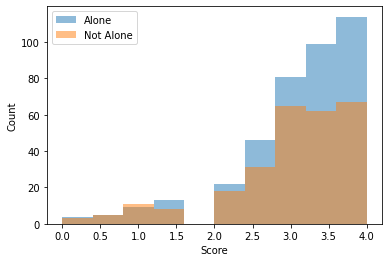

MannwhitneyuResult(statistic=array([49303.5]), pvalue=array([0.11276429]))

In [107]:
#Question 7
social = data_raw.iloc[:,476]
wolf = data_raw.filter(regex = "Wolf")

alone = []
not_alone = []

for i in range(len(wolf)):
    if social.iloc[i].item() == 1:
        if not np.isnan(wolf.iloc[i].item()):
            alone.append(wolf.iloc[i])
    elif social.iloc[i] == 0:
        if not np.isnan(wolf.iloc[i].item()):
            not_alone.append(wolf.iloc[i])

result = stats.mannwhitneyu(not_alone, alone)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("The score of The Wolf of Wall Street does exhibit social watching")
else:
    print("The score of The Wolf of Wall Street does not exhibit social watching")
    
    
m_data = []
for m in alone:
    m_data.append(m.item())
    
f_data = []
for m in not_alone:
    f_data.append(m.item())
    
pyplot.hist(m_data, bins=10, alpha=0.5, label="Alone")
pyplot.hist(f_data, bins=10, alpha=0.5, label="Not Alone")
pyplot.xlabel("Score")
pyplot.ylabel("Count")
pyplot.gca().legend(["Alone", "Not Alone"])
pyplot.show()
result

In [18]:
#Question 8
results = []
final_results = []

for movie in movies:
    social = data_raw.iloc[:,476]
    current_movie = movies[movie]

    alone = []
    not_alone = []

    for i in range(len(current_movie)):
        if social.iloc[i].item() == 1:
            if not np.isnan(current_movie.iloc[i].item()):
                alone.append(current_movie.iloc[i])
        elif social.iloc[i] == 0:
            if not np.isnan(current_movie.iloc[i].item()):
                not_alone.append(current_movie.iloc[i])

    results.append(stats.mannwhitneyu(alone, not_alone))
    
for result in results:
    if result.pvalue < SIG_LEVEL:
        final_results.append(result)
        
print(len(final_results)/400)

0.025


In [28]:
#Question 9
homealone = data_raw.iloc[:,285]
findingnemo = data_raw.iloc[:,138]
homealone = homealone[np.logical_not(np.isnan(homealone))]
findingnemo = findingnemo[np.logical_not(np.isnan(findingnemo))]
stats.kstest(homealone, findingnemo)

KstestResult(statistic=0.15269080020897632, pvalue=6.379381467525036e-10)

In [54]:
# Question 10

list_of_franchises  = ["Star Wars", "Harry Potter", "The Matrix", "Indiana Jones", "Jurassic Park", "Pirates of the Caribbean", "Toy Story", "Batman"]

for franchise in list_of_franchises:
    franchise_movies = data_raw.filter(regex = franchise)
    for m in franchise_movies:
        movie_data = movies[m]
        other_movies = np.mean(pd.DataFrame(movies.loc[:, movies.columns != m].filter(regex = franchise)), axis=1)
        movie_data = movie_data[np.logical_not(np.isnan(movie_data))]
        other_movies = other_movies[np.logical_not(np.isnan(other_movies))]
        result = stats.mannwhitneyu(other_movies, movie_data)
        if result.pvalue < SIG_LEVEL:
            print(f"{m} is significantly inconsistant from the {franchise} franchise ({result.pvalue})")
        else:
            print(f"{m} is not significantly inconsistant from the {franchise} franchise ({result.pvalue})")

Star Wars: Episode IV - A New Hope (1977) is significantly inconsistant from the Star Wars franchise (2.3450502229954436e-08)
Star Wars: Episode II - Attack of the Clones (2002) is significantly inconsistant from the Star Wars franchise (2.1000042457004973e-12)
Star Wars: Episode V - The Empire Strikes Back (1980) is significantly inconsistant from the Star Wars franchise (2.0913070644738035e-15)
Star Wars: Episode 1 - The Phantom Menace (1999) is significantly inconsistant from the Star Wars franchise (1.6842626621129465e-06)
Star Wars: Episode VII - The Force Awakens (2015) is significantly inconsistant from the Star Wars franchise (1.2122254655003124e-19)
Star Wars: Episode VI - The Return of the Jedi (1983) is significantly inconsistant from the Star Wars franchise (1.7352516154109993e-10)
Harry Potter and the Sorcerer's Stone (2001) is significantly inconsistant from the Harry Potter franchise (6.54317976666447e-05)
Harry Potter and the Deathly Hallows: Part 2 (2011) is not signif

In [111]:
# Extra Credit
# Compare if males enjoy movies differently alone or in a group and same for females

for movie in movies:
    social = data_raw.iloc[:,476]
    genders = data_raw.iloc[:,474]
    current_movie = movies[movie]
    
    alone_male = []
    alone_female = []
    not_alone_male = []
    not_alone_female = []
    
    for i in range(len(current_movie)):
        if social.iloc[i].item() == 1:
            if not np.isnan(current_movie.iloc[i].item()):
                if genders.iloc[i].item() == 1:
                    if not np.isnan(current_movie.iloc[i].item()):
                        alone_female.append(current_movie.iloc[i])
                elif genders.iloc[i] == 2:
                    if not np.isnan(current_movie.iloc[i].item()):
                        alone_male.append(current_movie.iloc[i])
        elif social.iloc[i] == 0:
            if not np.isnan(current_movie.iloc[i].item()):
                if genders.iloc[i].item() == 1:
                    if not np.isnan(current_movie.iloc[i].item()):
                        not_alone_female.append(current_movie.iloc[i])
                elif genders.iloc[i] == 2:
                    if not np.isnan(current_movie.iloc[i].item()):
                        not_alone_male.append(current_movie.iloc[i])
    

# Perform Comparisons:
result = stats.mannwhitneyu(alone_male, alone_female)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("Alone males rate movies significantly differently from alone females")
else:
    print("Alone males do not rate movies significantly differently from alone females")
print()
    
result = stats.mannwhitneyu(not_alone_male, not_alone_female)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("Males in groups rate movies significantly differently females in groups")
else:
    print("Males in groups do not rate movies significantly differently females in groups")
print()
    
result = stats.mannwhitneyu(alone_male, not_alone_male)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("Males who are alone rate movies significantly differently males in groups")
else:
    print("Males who are alone do not rate movies significantly differently males in groups")
print()
    
result = stats.mannwhitneyu(alone_female, not_alone_female)
print(result.pvalue)
if result.pvalue < SIG_LEVEL:
    print("Females who are alone rate movies significantly differently females in groups")
else:
    print("Females who are alone do not rate movies significantly differently females in groups")

0.004884091588092327
Alone males rate movies significantly differently from alone females

0.4436414283231227
Males in groups do not rate movies significantly differently females in groups

0.054261363758888896
Males who are alone do not rate movies significantly differently males in groups

0.3098783531995011
Females who are alone do not rate movies significantly differently females in groups
